In [1]:
import Pkg; Pkg.activate("C:/Users/s151781/AppData/Local/Julia-1.3.1/GN/Project.toml")
using Revise
using Distributions
using PyPlot
using FFTW
using Compat
using WAV
using DSP
using Base64
using ForneyLab
using LinearAlgebra
using ProgressMeter
using Distributed

include("../functions/auxiliary/audioplayer.jl")
include("../functions/auxiliary/workflow.jl")
include("../functions/auxiliary/fourier.jl")
include("../functions/auxiliary/visualization.jl")
include("../functions/auxiliary/buffer.jl")
include("../functions/auxiliary/warpedfilter.jl")
include("../functions/preprocessing.jl")
include("ARFB_fast_cossin.jl")

Activating environment at `C:\Users\s151781\AppData\Local\Julia-1.3.1\GN\Project.toml`


In [2]:
# load speech data
xi, fs = wavread("../data/airco.wav", format="native")
fs = Int(fs)
xi = convert(Array{Float64,1}, xi[1*fs:4*fs])

# pre-process signals
yi = preprocess(xi, fs) 

N = length(yi)
t = collect(1:N)/8000
fs = 8000

audioplayers(yi, fs=8000);

<source src="data:audio/wav;base64,UklGRkB3AQBXQVZFZm10ICgAAAD+/wEAQB8AAAB9AAAEACAAFgAgAAAAAAADAAAAAAAQAIAAAKoAOJtxZGF0YQR3AQCsZgw+p76QPi+woD5FjbU+F4u1PmTHzD58EOo+RkkDP68iDT9uSgM/fvvdPlgozT5cGbw+RErRPjlKzz6kJMc+/Q6YPlbLjz4wAJI+jjquPnVEmD4Qyns+m7mBPu+gBj7PAi8+AvwiPq5FVbyWY0G+Eud+vkwLKL4wNr85DNvOPfZu+7sP6c69oz08vs+tA74t2Dy9eZkNviFKLL5ECIC+q0LNvqfC5b5Zjui+GfqSvv1emb6PMni+uFKbvmhQt74yJL6+ikftvhtDBr8ujP6+lfYJv2A/9b5XacS+GX5yvmTGZL6xk5e+wR6PvuE2b76Ga1q+SvO7vT1nVr11UFy8VkvKvUDbjL5KjKS+T/FbvjGhaL2sHnA9oNyhPOYblL1og6K9tQaLPXjsbT5OOmQ+F48+PhKelD3HVfY8o/CAPtUi6T6Dvwc/OIbcPoggnT5RuK8+w6H9Ph88Ij989Ck/23IKPzeTFz+YjSE/bmE1PwnEKj+sowg/Uuz1PsDU6T5DwOg+nP3pPr6Cvj5Cgoo+hlqKPi4JvT6BIas+3g4pPgaRn7xMnB+9BJymPIs87z2VFO88IIYDvvreq75+uta+bsyzvt3aUL4bgF2+tKCkvgnXyL7krOC+QlDsvh+F3b5x2dy+I3HVvpRRvb6sbre+smyqvpQjtr7owIG+i5h4vrJLg77gIl++vn9uvuAAg77KJVC+66iFvsqAhb4x/nq+lhJ7vjaVQb6xLQ2+7wOJvovf/L4zAhi/5d4Jv7PZ177oUIe+F1FVvmVAYL752bm+20e/vm6VuL6UrKq+2WhpvmVBCr6o8yK+OJTQvUN8iL3q7Ym9ercsObeKLj7VaaI+df7CPvLdxT6+QZs+XtOZPlMHxj7qcAM/EgUlP2GFKT8w7RA/rET/PqVrAD/1UiE/E9VCPxHIKj+7BAg/82e7PkFFoz6oZ64+yx/4Pg2PMz+hCD8/Du4wPxBoCj+4fQA/JpHePr1n7D7AbNY+HsKbPiyQbT6c8UE+O0s2PlYJBT4rWd48ToyNvQ4TXL4sFm++ZuFvvlNlhr6S67K+P4wBv9dSIr8xJB6/0SEKv3/U8r4obQe/tAEev1yMOb+3/TG/tyYav1L7G79Snye/x1QSv8OkB7+CguK+OvXevooz275V7dW++ca5vmGdkL7H1pS+glSIvrAVYL5yEzy+aPk2vskKJL7iCzK+3U26vRPsRL5oW9K9tG6VPR5TpT2+gvs8RejvvZV7QL0/p2C9GlCNuBxCTD6Wj2o+2+eJPT/sbLy42TU95K9hPpgkvz7Ak+o+7bLjPiDhqz6PC7o+hYDKPqPM2z5Ba9U+yNrNPvZPtj40C5c+uD1+PuIVrj5427g+/orWPtdH0T7xxbo++fWPPjZRRT4kjKs9JbY8PuGsfz6/dLE+iIqnPl1qSj5atfE9UDWfPejhaz4RXq4+F/y7PnfrqD7Q+JY964jPPO/Ppj2WOrs9pW+CPYvAtrw+PTO9kaN7vWUy2rvDab084jUSvQY1Eb771lG+XdBdvse2KL7gc02+Q8LmvhYNA7+QMBW/FDANv882877uVQq/srosvx/SS78Erjy/GBEtv1ZFFr/8I/m+TB4Sv4xBD79a9f++CrGUvuUKQr5JOE2+eVQovuOR+b2kCP67IT2iPcQ4xj3j4909DnskPq+xkT4wMqA+VN99PrbBIj4cPaU9kK59PXLCmT5NVb4+A1a7PipelD6yua89crFKPXwPlD3RfYg+Ce6kPrTzfT67618+kA+KPj38nT5Sr7s+e+LWPtgGyz53xas+76onPlc0lD64V7s+In7cPkgVzj4yWKw+z4V+Pnk/eT4WCpE+LL+FPqlsbT75nyI+k9b1Pa8uID4Q0/49D/MJPjCWEj7GOc09Eyi1Pb4mRz10XnI97HrRPLWLq712iwm+ecnIvUq8kr1v+Cy9b5WQu9T99b1uI06+HMJzvovfWb5lrdm97A89vrIIq752dty+W4Lmvj9qB78jugK/u54Bv19iA7+iXQO/O/UUv/zrKL+K8FO/9IxtvyIzXL/lkU2/HD8vv7y6Hr8zxxa/GikUv2GHAL9POdG+XBKgvsUmOL4dWvC9fc7JvXROxj1h8m8+dFDDPly4AD+IOOA+F5uzPi1MtT4ROsw+JcLyPgOiHz94uyM/GfgSPxwk8j7hW+U+awwTP3hyHz+QHhI/22z/PlNZ2z420fY+smEOPygnCD+UMPg+Kh+/PglKtz40bK4+uJXAPi1owj7IDqY+kICOPsJyoj7tXLI+N3CsPvXhaD7y/UI+B+VlPmvghT6AyKc+bbuHPnM3Kj6FV7y6cNrIvb8bjL2AwCG+phRlvh26ib51taa+B3NqvjZzVb7uFo6+cxjevvsaFL/+Awy/tXP/vuoBB78QZxq/T2Uuv6hiH7/h3AC/a9Sovsu/iL6Z18i+AtUNv2YJHL8C1AO/RKO/vob3pr71DZW+FI2cvvO6o76hNUi+cJo3vpUyQ778jBq+ryHbvQ7bjb1Osk69w8+qva5wTb6J5k2+FqBDvVhb9j0IUFM+eo34PWXp2j0wRdI8PQYIPgOVHj68EIA90kVLPdSodj3A9zM+suOOPltQoT6oNpc+gT+mPs62xj7RP/k+rPcZP/6mIj8ECwQ/64HmPpdH7j58tc4+MK4KP+TX8z4jw+A+saUEP1OMDz+u0Ac/TNYIP9r0Gz9FXgc/jMXxPm9jzT4kZZs+FJCUPscHtT4d3a0+slNVPjSIwz0zyTO89VQFvrfLBL4qo4K+rnB0vq4ok74Vx6K+YZ/MvmIbFL/4USe/+BUVv8PhAb9dAgi/76Ukv8W7Vb/932q/ilhjv+32Q7+G1g+/PhMGv7To/L7jPfC+p0rzvv5b4b4EtcW+Kbfmvgips75cvYq+xKQHvi/Ohb053tO998hNvnaxbL72Qxq+TkGHPd/9ZD2J+x+937vIvZFza72C9F09IJtRPjzxbT4hXD8+GkAlPiUEaT4V2Yo+4+LNPoyl9z7betQ+asvHPqNKzD7MFtc+ePubPqgbXD55QMs9T+9XPtQFuz57tP4+5MThPmnYmD6BXSA+pwFCPlCsuD6vheg+pdvpPgZg9z5tnOQ+1CwUP9i7Fj/IEBg/0In8PuWLuj4OW5w+UGe3PqxC9T4xtA0/PqX6Pshypz4boz8+uT4GPmCwJT7J0So+zHbpPa1U+bydbaC98b4Qvrx62LziwwA9SLpsPI2P7r09Xny+3ty6vnvNBr89JBi/+q0ev2XjF797XiK/zWwUv3HdC78UFRe/GJISv6QXDL9J8h2/eagmv4zaKL/j+y2/Z+pOv5aSTL8fpjK/R3stv8qqGb9rCPu+qY/vvu9Dxr5cV8u+/R7ivuJvrb49G56+E9WOvjexVr6h5VG+D03OvbuhuDwp4e49VzpuPi48gT5nF5Q+n5yVPjp8hD7dd6Y+Ala/PnT9rD7gIro+VS2xPvoDmT721s8+jgfIPgXD0T70Hrs+ubiaPki7NT46eg4+1SNHPeOkPj4XwZM+oWbEPlMMqz6hzmg+64OPPnTJuT4w3cE+p9GMPo+9Fz7qHm88unRmPnvJ4D4YWBU/g6MJP5Kzrz7VjAY+mhqHPX8z+j1Yv5s+U16iPrAzVD5Gtim9TB80vpdW7r2WfG89XDm9PU0cJL31fBK+P+Jivn3pnb7o7a2+RT/Cvs2M8b7PQAy/tBr2vuY+777ZjM++CRvKvmbB5b7RTOK+zl/3vlBWAb+n6/G+ZjX0voqMx76IPIq+gxBZvnLeKL5O8Ui+zOVDvvpFHTyyk4E+SHvTPvSpoz7SnBo+L+HzPHd+uTzrcCU+aBuhPp1Psj45tqw+87w/Pr1t8z29O4A+bZe+Pt6c2j6x0

In [3]:
f = collect(0:fs/25:fs/2)
bufsize = 1#length(f)
z_pole = 0.4092 
W, U, S = allpass_update_matrix_segment(length(f), bufsize, z_pole)

# create fg
fg = FactorGraph()

# auto-regressive filter bank
@RV [id=:smin] smin ~ GaussianMeanVariance(placeholder(:μ_smin, dims=(2*length(f),)), placeholder(:Σ_smin, dims=(2*length(f),2*length(f))))
@RV [id=:θ] θ ~ GaussianMeanVariance(placeholder(:μ_θ, dims=(length(f),)), placeholder(:Σ_θ, dims=(length(f),length(f))))
@RV [id=:γ] γ ~ GammaVector(placeholder(:a_γ, dims=(length(f),)), placeholder(:b_γ, dims=(length(f),)))
@RV [id=:s] s ~ AutoregressiveFilterbank(smin, θ, γ)

# frequency warping
@RV [id=:taps] taps = placeholder(:c, dims=(length(f),2*length(f))) * s
@RV [id=:Ymin] Ymin ~ GaussianMeanVariance(placeholder(:μ_Ymin, dims=(2*length(f),)), placeholder(:Σ_Ymin, dims=(2*length(f),2*length(f))))
@RV [id=:x] x
@RV [id=:Y] Y = W*Ymin + U*x
Multiplication(taps, Y, S)
@RV [id=:y] y ~ GaussianMeanVariance(x, placeholder(:Σ_x, dims=(1,1)))
placeholder(y, :y, dims=(1,))
       
q = PosteriorFactorization(smin, s, θ, γ, ids=[:smin, :s, :θ, :γ])

ForneyLab.draw(fg)

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.38.0 (20140413.2041)
 -->
<!-- Title: G Pages: 1 -->
 
 
 G 
 
<!-- 10386943974877439193 -->
 10386943974877439193 
 
 clamp_3 
 
<!-- 5093199999577865456 -->
 5093199999577865456 
 
 placeholder_Σ_smin 
 
<!-- 13826567923482907812 -->
 13826567923482907812 
 
 placeholder_μ_Ymin 
 
<!-- 16387430981926644372 -->
 16387430981926644372 
 
 placeholder_a_γ 
 
<!-- 16109509800022743066 -->
 16109509800022743066 
 
 𝒩 
 gaussianmeanvariance_1 
 
<!-- 16109509800022743066--5093199999577865456 -->
 16109509800022743066--5093199999577865456 
 
 Σ_smin 
 1 out 
 3 v 
 
<!-- 11929821061535732543 -->
 11929821061535732543 
 
 placeholder_μ_smin 
 
<!-- 16109509800022743066--11929821061535732543 -->
 16109509800022743066--11929821061535732543 
 
 μ_smin 
 1 out 
 2 m 
 
<!-- 37048553606416518 -->
 37048553606416518 
 
 placeholder_Σ_θ 
 
<!-- 10543607895671553576 -->
 10543607895671553576 
 
 × 
 multiplication_3 
 
<!-- 15730925205434007047 -->
 15730925205434007047 
 
 clamp_2 
 
<!-- 10543607895671553576--15730925205434007047 -->
 10543607895671553576--15730925205434007047 
 
 clamp_2 
 1 out 
 3 a 
 
<!-- 1612951218126844717 -->
 1612951218126844717 
 
 𝒩 
 gaussianmeanvariance_4 
 
<!-- 1612951218126844717--10543607895671553576 -->
 1612951218126844717--10543607895671553576 
 
 x 
 2 in1 
 2 m 
 
<!-- 5196575127372567791 -->
 5196575127372567791 
 
 placeholder_Σ_x 
 
<!-- 1612951218126844717--5196575127372567791 -->
 1612951218126844717--5196575127372567791 
 
 Σ_x 
 1 out 
 3 v 
 
<!-- 11360821667890938137 -->
 11360821667890938137 
 
 × 
 multiplication_2 
 
<!-- 2166808814186499134 -->
 2166808814186499134 
 
 clamp_1 
 
<!-- 11360821667890938137--2166808814186499134 -->
 11360821667890938137--2166808814186499134 
 
 clamp_1 
 1 out 
 3 a 
 
<!-- 4453753051385917931 -->
 4453753051385917931 
 
 𝒩 
 gaussianmeanvariance_3 
 
<!-- 11360821667890938137--4453753051385917931 -->
 11360821667890938137--4453753051385917931 
 
 Ymin 
 1 out 
 2 in1 
 
<!-- 7410294892306740574 -->
 7410294892306740574 
 
 placeholder_y 
 
<!-- 7410294892306740574--1612951218126844717 -->
 7410294892306740574--1612951218126844717 
 
 y 
 1 out 
 1 out 
 
<!-- 3256780974295204821 -->
 3256780974295204821 
 
 + 
 addition_1 
 
<!-- 3256780974295204821--10543607895671553576 -->
 3256780974295204821--10543607895671553576 
 
 variable_3 
 1 out 
 3 in2 
 
<!-- 3256780974295204821--11360821667890938137 -->
 3256780974295204821--11360821667890938137 
 
 variable_2 
 1 out 
 2 in1 
 
<!-- 17472023076489946368 -->
 17472023076489946368 
 
 𝒩 
 gaussianmeanvariance_2 
 
<!-- 17472023076489946368--37048553606416518 -->
 17472023076489946368--37048553606416518 
 
 Σ_θ 
 1 out 
 3 v 
 
<!-- 6683220328662894673 -->
 6683220328662894673 
 
 placeholder_μ_θ 
 
<!-- 17472023076489946368--6683220328662894673 -->
 17472023076489946368--6683220328662894673 
 
 μ_θ 
 1 out 
 2 m 
 
<!-- 8397845938668293728 -->
 8397845938668293728 
 
 AutoregressiveFilterbank 
 autoregressivefilterbank_1 
 
<!-- 8397845938668293728--16109509800022743066 -->
 8397845938668293728--16109509800022743066 
 
 smin 
 1 out 
 2 x 
 
<!-- 8397845938668293728--17472023076489946368 -->
 8397845938668293728--17472023076489946368 
 
 θ 
 1 out 
 3 θ 
 
<!-- 6487129938354942504 -->
 6487129938354942504 
 
 GammaVector 
 gammavector_1 
 
<!-- 8397845938668293728--6487129938354942504 -->
 8397845938668293728--6487129938354942504 
 
 γ 
 1 out 
 4 γ 
 
<!-- 13836912959654027739 -->
 13836912959654027739 
 
 placeholder_b_γ 
 
<!-- 8146964612429702936 -->
 8146964612429702936 
 
 × 
 multiplica

In [4]:
# generate algorithm
algo = variationalAlgorithm(q)
source_code = compatibility_fix(algorithmSourceCode(algo))

# fix stupid univariate RV to vector issue (caused by [ ; ; ; ] still creating a 1-D array)
add_dim(x::Array) = reshape(x, (size(x)...,1))
source_code = replace(source_code, "messages[7] = ruleSPMultiplicationIn1GNP(messages[6], nothing, Message(MatrixVariate, PointMass, m=[1.0; 0.0; -0.4092; 0.0; 0.16744464; 0.0; -0.068518346688; 0.0; 0.0280377074647296; 0.0; -0.011473029894567353; 0.0; 0.004694763832856961; 0.0; -0.0019210973604050683; 0.0; 0.0007861130398777539; 0.0; -0.0003216774559179769; 0.0; 0.00013163041496163616; 0.0; -5.386316580230151e-5; 0.0; 2.204080744630178e-5; 0.0]))" => "messages[7] = ruleSPMultiplicationIn1GNP(messages[6], nothing, Message(MatrixVariate, PointMass, m=add_dim([1.0; 0.0; -0.4092; 0.0; 0.16744464; 0.0; -0.068518346688; 0.0; 0.0280377074647296; 0.0; -0.011473029894567353; 0.0; 0.004694763832856961; 0.0; -0.0019210973604050683; 0.0; 0.0007861130398777539; 0.0; -0.0003216774559179769; 0.0; 0.00013163041496163616; 0.0; -5.386316580230151e-5; 0.0; 2.204080744630178e-5; 0.0])))")
source_code = replace(source_code, "messages[9] = ruleSPMultiplicationOutNGP(nothing, messages[8], Message(MatrixVariate, PointMass, m=[1.0; 0.0; -0.4092; 0.0; 0.16744464; 0.0; -0.068518346688; 0.0; 0.0280377074647296; 0.0; -0.011473029894567353; 0.0; 0.004694763832856961; 0.0; -0.0019210973604050683; 0.0; 0.0007861130398777539; 0.0; -0.0003216774559179769; 0.0; 0.00013163041496163616; 0.0; -5.386316580230151e-5; 0.0; 2.204080744630178e-5; 0.0]))" => "messages[9] = ruleSPMultiplicationOutNGP(nothing, messages[8], Message(MatrixVariate, PointMass, m=add_dim([1.0; 0.0; -0.4092; 0.0; 0.16744464; 0.0; -0.068518346688; 0.0; 0.0280377074647296; 0.0; -0.011473029894567353; 0.0; 0.004694763832856961; 0.0; -0.0019210973604050683; 0.0; 0.0007861130398777539; 0.0; -0.0003216774559179769; 0.0; 0.00013163041496163616; 0.0; -5.386316580230151e-5; 0.0; 2.204080744630178e-5; 0.0])))")

eval(Meta.parse(source_code))
println(source_code)

begin

function stepγ!(data::Dict, marginals::Dict=Dict(), messages::Vector{Message}=Array{Message}(undef, 2))

messages[1] = ruleVBGammaVectorOut(nothing, ProbabilityDistribution(ForneyLab.Multivariate, PointMass, m=data[:a_γ]), ProbabilityDistribution(ForneyLab.Multivariate, PointMass, m=data[:b_γ]))
messages[2] = ruleVariationalARFBIn3PPPN(marginals[:s], marginals[:smin], marginals[:θ], nothing)

marginals[:γ] = messages[1].dist * messages[2].dist

return marginals

end

function steps!(data::Dict, marginals::Dict=Dict(), messages::Vector{Message}=Array{Message}(undef, 14))

messages[1] = ruleVariationalARFBOutNPPP(nothing, marginals[:smin], marginals[:θ], marginals[:γ])
messages[2] = ruleSPMultiplicationOutNGP(nothing, messages[1], Message(MatrixVariate, PointMass, m=data[:c]))
messages[3] = ruleSPMultiplicationIn1GNP(messages[2], nothing, Message(MatrixVariate, PointMass, m=[1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.

In [5]:
μ_θ_mem = Array{Float64,2}(undef, N, length(f))
Σ_θ_mem = Array{Float64,2}(undef, N, length(f))
m_γ_mem = Array{Float64,2}(undef, N, length(f))
μ_x_mem = Array{Float64,1}(undef, N)
Σ_x_mem = Array{Float64,1}(undef, N)

# priors
μ_smin = zeros(2*length(f))
Σ_smin = 0.1*Ic(2*length(f))
μ_Ymin = zeros(2*length(f))
Σ_Ymin = 0.1*Ic(2*length(f))
μ_θ = 0.0*ones(length(f))
Σ_θ = 0.5*Ic(length(f))
a_γ = 1.0*ones(length(f))
b_γ = 0.00001*ones(length(f))
Σ_x = 0.01*0.01*Ic(bufsize)

p = Progress(N-length(f))

for n = length(f):N
    
    next!(p)
    
    # fill marginals dictionary
    marginals = Dict()
    marginals[:smin] = ProbabilityDistribution(ForneyLab.Multivariate, GaussianMeanVariance, m=μ_smin, v=Σ_smin)
    marginals[:θ] = ProbabilityDistribution(ForneyLab.Multivariate, GaussianMeanVariance, m=μ_θ, v=Σ_θ)
    marginals[:γ] = ProbabilityDistribution(ForneyLab.Multivariate, GammaVector, a=a_γ, b=b_γ)
    
    # fill data dictionary
    data = Dict()
    data[:μ_smin] = μ_smin
    data[:Σ_smin] = Σ_smin
    data[:μ_Ymin] = μ_Ymin
    data[:Σ_Ymin] = Σ_Ymin
    data[:μ_θ] = μ_θ
    data[:Σ_θ] = Σ_θ
    data[:a_γ] = a_γ
    data[:b_γ] = b_γ
    data[:c] = reshape( [cos.(2*pi*f*t[n-length(f)+1:n]') sin.(2*pi*f*t[n-length(f)+1:n]')]', length(f), 2*length(f))
    data[:Σ_x] = Σ_x*Ic(bufsize)
    data[:y] = yi[n-bufsize+1:n]   
    
    # make prediction
    messages = Array{Message}(undef, 14)
    Base.invokelatest(steps!, data, marginals, messages)
    μ_x_mem[n] = ForneyLab.unsafeMean(messages[7].dist)[end]
    Σ_x_mem[n] = ForneyLab.unsafeCov(messages[7].dist)[end,end]
    
    # perform updates
    for _ in 1:5
        Base.invokelatest(steps!, data, marginals)
        Base.invokelatest(stepθ!, data, marginals)
        Base.invokelatest(stepγ!, data, marginals)
        Base.invokelatest(stepsmin!, data, marginals)
    end
    Base.invokelatest(steps!, data, marginals, messages)
    
    # update parameters
    μ_smin = ForneyLab.unsafeMean(marginals[:s])
    Σ_smin = ForneyLab.unsafeCov(marginals[:s])
    μ_θ = ForneyLab.unsafeMean(marginals[:θ])
    Σ_θ = ForneyLab.unsafeCov(marginals[:θ])
    a_γ = marginals[:γ].params[:a]
    b_γ = marginals[:γ].params[:b]
    μ_Ymin = ForneyLab.unsafeMean(messages[3].dist * messages[10].dist)
    Σ_Ymin = ForneyLab.unsafeCov(messages[3].dist * messages[10].dist)

    # save parameters
    μ_θ_mem[n,:] = μ_θ
    Σ_θ_mem[n,:] = diag(Σ_θ)
    m_γ_mem[n,:] = a_γ ./ b_γ
    
end

Progress: 100%|█████████████████████████████████████████| Time: 0:05:41:54m


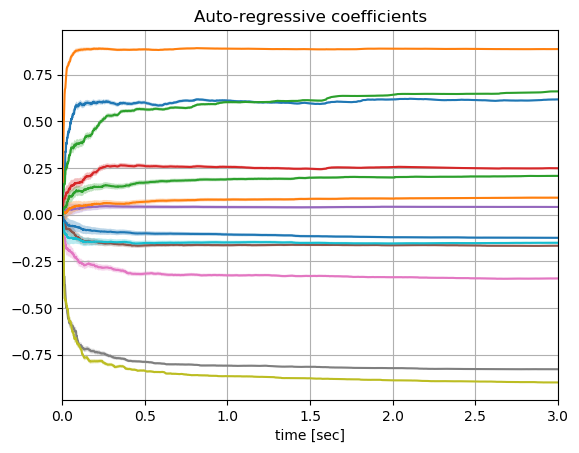

(nothing, PyObject Text(0.5, 1.0, 'Auto-regressive coefficients'), PyObject Text(0.5, 24.0, 'time [sec]'), (0, 3))

In [6]:
for k = 1:size(μ_θ_mem,2)
    plt.plot(t[bufsize:end], μ_θ_mem[bufsize:end,k])
    plt.fill_between(t[bufsize:end], μ_θ_mem[bufsize:end,k].+sqrt.(Σ_θ_mem[bufsize:end,k]), μ_θ_mem[bufsize:end,k].-sqrt.(Σ_θ_mem[bufsize:end,k]), alpha=0.3)
end
plt.grid(), plt.title("Auto-regressive coefficients"), plt.xlabel("time [sec]"), plt.xlim(0, 3)

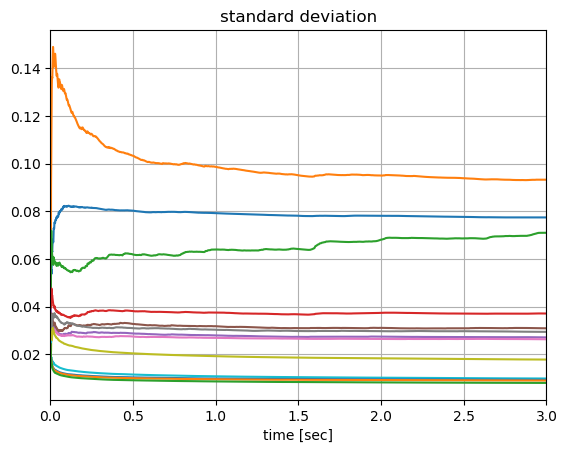

(nothing, PyObject Text(0.5, 1.0, 'standard deviation'), PyObject Text(0.5, 24.0, 'time [sec]'), (0, 3))

In [7]:
plt.plot(t[bufsize:end,:], 1 ./ sqrt.(m_γ_mem[bufsize:end,:]))
plt.grid(), plt.title("standard deviation"), plt.xlabel("time [sec]"), plt.xlim(0, 3)

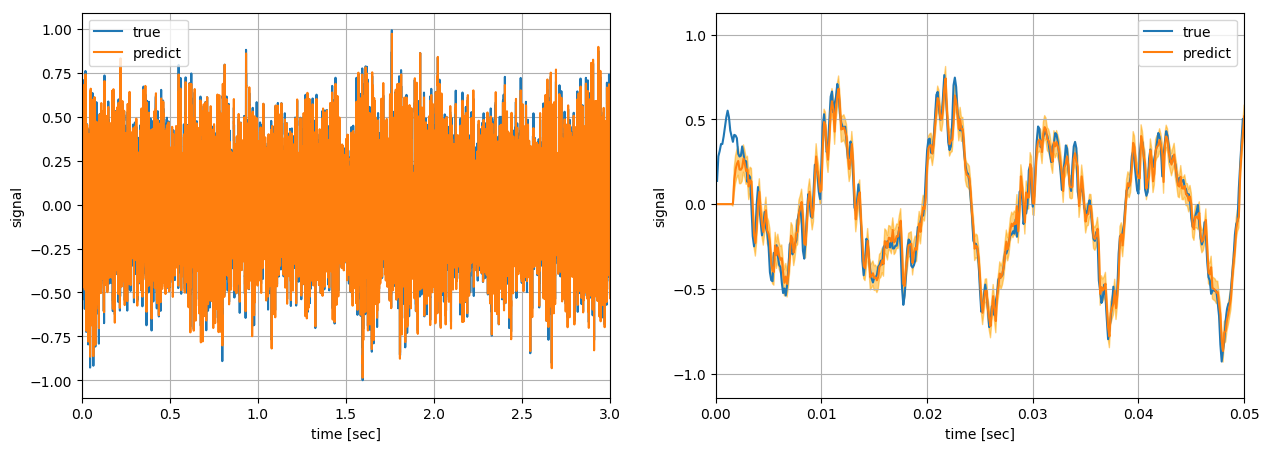

(nothing, PyObject <matplotlib.legend.Legend object at 0x000000000270B780>, (0.0, 0.05), PyObject Text(0.5, 24.0, 'time [sec]'), PyObject Text(666.8409090909089, 0.5, 'signal'))

In [20]:
_, ax = plt.subplots(ncols=2, figsize=(15,5))
ax[1].plot(t[bufsize:end], yi[bufsize:end], label="true")
ax[1].plot(t[bufsize:end], μ_x_mem[bufsize:end], label="predict")
ax[1].grid(), ax[1].legend(), ax[1].set_xlim(0,3), ax[1].set_xlabel("time [sec]"), ax[1].set_ylabel("signal")
ax[2].plot(t[bufsize:end], yi[bufsize:end], label="true")
ax[2].plot(t[bufsize:end], μ_x_mem[bufsize:end], label="predict")
ax[2].fill_between(t[bufsize:end], μ_x_mem[bufsize:end] .+ sqrt.(Σ_x_mem[bufsize:end]), μ_x_mem[bufsize:end] .- sqrt.(Σ_x_mem[bufsize:end]), alpha=0.5, color="orange")
ax[2].grid(), ax[2].legend(), ax[2].set_xlim(0.0,0.05), ax[2].set_xlabel("time [sec]"), ax[2].set_ylabel("signal")

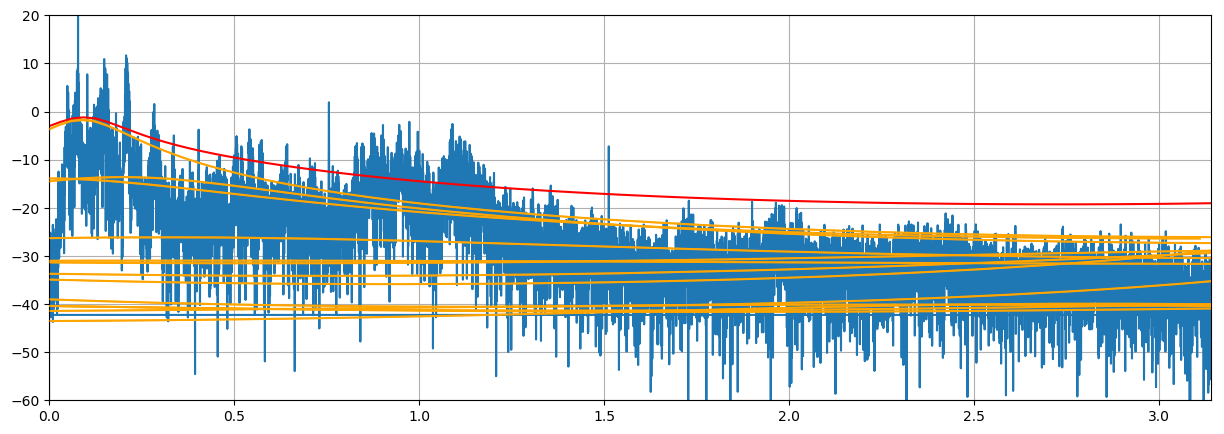

In [67]:
plt.figure(figsize=(15,5))

plt.plot(FFTW.fftfreq(length(yi), fs)/fs*2*pi, 10*log10.((abs.(FFTW.fft(yi)).^2)./length(yi)))

# calculate frequencies according to Bark
fB = 1/pi/2*2*atan.(( 1 - z_pole)/(1+z_pole) * tan.(pi*f/fs))*fs

tmp_psd = zeros(101)
for k = 1:length(f)
    θ_sampled, γ_sampled = AR_distributions([μ_θ_mem[end,k]], mat(1/Σ_θ_mem[end,k]), a_γ[k], b_γ[k])
    mean_psd, std_psd = summary_psd(θ_sampled, γ_sampled)
    mean_psd = vcat(reverse(mean_psd), mean_psd[2:end])
    std_psd = vcat(reverse(std_psd), std_psd[2:end])
    θx = collect(0:length(mean_psd)-1)/length(mean_psd)*2*pi .- pi .+ 2*pi*fB[k]/fs
    gca().plot(θx, mean_psd, color="orange", label="predicted psd")
    gca().fill_between(θx, mean_psd .- std_psd, mean_psd .+ std_psd, color="orange", alpha=0.5, zorder=100)
    tmp_psd = tmp_psd + 10 .^(mean_psd[101-Int(round(fB[k]/fs*200)):201-Int(round(fB[k]/fs*200))]/10)
end
gca().plot(collect(0:100)/100*pi, 10*log10.(tmp_psd), color="red")
plt.ylim(-60,20)
plt.xlim(0,pi)
plt.grid()

## Predictive performance

In [12]:
x_true = yi[length(f):end]
x_μ_pred = μ_x_mem[length(f):end]
x_σ_pred = sqrt.(abs.(Σ_x_mem[length(f):end]));

In [13]:
MSE = mean(abs2.(x_true - x_μ_pred))
MAE = mean(abs.(x_true - x_μ_pred))
BME = mean([logpdf(Normal(x_μ_pred[k], x_σ_pred[k]), x_true[k]) for k = 1:length(x_true)])

MSE, MAE, BME

(0.005012006413723044, 0.05629822277447419, 1.1103833064034023)